In [ ]:
import tensorflow as tf

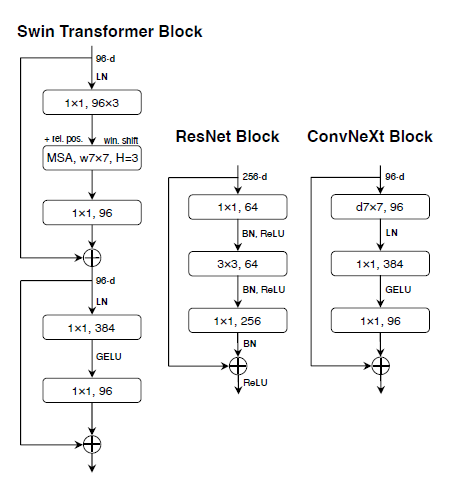

In [ ]:
def convnext_block(input,channels,name=""):

  x = tf.keras.layers.DepthwiseConv2D(kernel_size=(7,7),padding="same",name=name+"_depth_wise")(input)
  x = tf.keras.layers.LayerNormalization(epsilon= 1e-6,name=name+"_layer_norm")(x)
  x = tf.keras.layers.Conv2D(filters = 4*channels,kernel_size=(1,1),name=name+"_conv_layer1")(x)
  x = tf.keras.layers.Activation('gelu')(x)
  x = tf.keras.layers.Conv2D(channels,kernel_size=(1,1),name=name+"_conv_layer2")(x)
  x = tf.keras.layers.Add()([x,input])


  return x

In [ ]:
def build_convnext(input_shape,model_type="ConvNext-T"):




  depth = [96,192,384,768]
  blocks = [3,3,9,3]

  if model_type=="ConvNext-S":
    depth = [96,192,384,768]
    blocks = [3,3,27,3]

  if model_type=="ConNext-B":
    depth = [128,256,512,1024]
    blocks = [3,3,27,3]

  if model_type=="ConvNext-L":
    depth = [192,384,768,1536]
    blocks = [3,3,27,3]

  if model_type=="ConvNext-XL":
    depth = [256,512,1024,2048]
    blocks = [3,3,27,3]




  inputs = tf.keras.layers.Input(shape=input_shape)
  # # Stem Layer

  x = tf.keras.layers.Conv2D(depth[0],kernel_size=(4,4),padding="same",name="stem_layer")(inputs)
  x = tf.keras.layers.LayerNormalization(epsilon= 1e-6,name="stem_layer_norm")(x)

  s = 1
  for d,b in zip(depth,blocks):
      for i in range(b):

        x = convnext_block(x,d,name="Stage"+str(s)+"_b"+str(i+1))

      if s>len(depth)-1:
        break
      x = tf.keras.layers.LayerNormalization(epsilon= 1e-6,name="Stage"+str(s+1)+"_layer_norm")(x)
      x = tf.keras.layers.Conv2D(depth[s],kernel_size=(2,2),padding="same",strides=2,name="Stage"+str(s)+"_down_sample")(x)
      s = s+1

  return tf.keras.Model(inputs=inputs,outputs=x)

In [ ]:
model = build_convnext((1024,1024,3),model_type="ConvNext-XL")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1024,  0           []                               
                                 3)]                                                              
                                                                                                  
 stem_layer (Conv2D)            (None, 1024, 1024,   12544       ['input_1[0][0]']                
                                256)                                                              
                                                                                                  
 stem_layer_norm (LayerNormaliz  (None, 1024, 1024,   512        ['stem_layer[0][0]']             
 ation)                         256)                                                          